# Lab session 1 ---- Linear Regression

Student: ASRAF ALI Abdul Salam Rasmi                                                                               
Date: 24/03/2019

## I. Introduction
In this exercise, we will implement linear regression with one and multiple variables, as well as gradient descent.

## II. Linear regression with one variable
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new food truck. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next. The file lab1data1.txt contains the dataset: the first column is the poplulation of a city and the second column is the profit of a food truck in that city. An negative value for profit indicates a loss.

### Solution Question 1

In [1]:
# Import the necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

# Load the Data from .txt file
Data = np.loadtxt('lab1data1.txt', delimiter=',')

# Separate Input (x) and Output (y) data
x=np.atleast_2d(Data[:,:-1])
y=Data[:,-1]

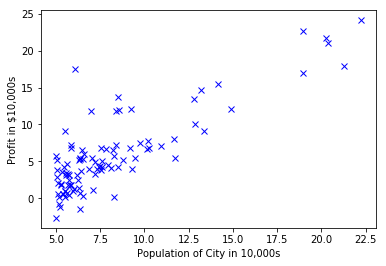

In [2]:
# Function to Plot the Data

def plotData(x,y):
    plt.plot(x,y,'bx')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show()

plotData(x,y)

### Solution Question 2

In [3]:
# Function to perform Linear Regression (Method 1)

def linearReg(x,y):
    
    # Calculate the Slope(m) and Intercept(b) from y = W1*x + W0
    Length = len(x); # Size of the data
    
    # Slope W1 is calculated by W1 = x^*y^ - xy^/ (x^)^2 - (X^2)^
    A = sum(x*y)-sum(x)*sum(y)
    B = sum(x**2)-(sum(x))**2
    W1 = (Length*A)/(Length*B)
    
    # Intercept is calculated by W0 = y - W1*x 
    W0 = np.mean(y)-W1*np.mean(x)
    
    W =  [W1,W0]
    return W

In [4]:
# Function to perform Linear Regression (Method 2)
def linRegres(x,y):
    
    # Make x = [1 x] to take care of bias
    bias = np.ones((x.shape[0],1))
    Xstack = np.asmatrix(np.hstack((bias,x)))
    
    # Perform Regression using numpy built-in function
    W2,_,_,_=np.linalg.lstsq(Xstack,y,rcond=0)
    
    return W2

[-3.89578088  1.19303364]


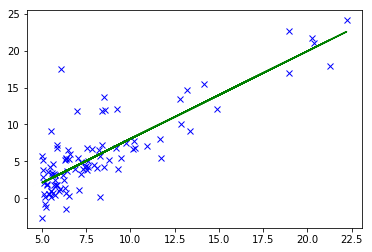

In [5]:
# Plot data

Wt = linearReg(x,y)
[W1, W0] = Wt
yReg = W1 * x + W0

W2 = linRegres(x,y)
yRegres = W2[1] * x + W2[0]

# Print the Slope and Intercept
print(W2)

# Plot the best Fit
plt.plot(x,y,'bx')
plt.plot(x,yRegres, 'g')    
plt.show()

### Solution Question 3

In [6]:
# Function to Predict the Future Values

def predict(W,x):
    x= np.vstack([x.flatten(),np.ones(len(x.flatten()))])
    predict = np.dot(W,x)
    return predict

In [7]:
# Predictions for New Values

x_New = np.array([3.5,7.0])
W = [W2[1],W2[0]]
y_New = predict(W,x_New)
print('The Predicted Profits are : {}'.format(y_New*10000))

The Predicted Profits are : [ 2798.36876352 44554.54631015]


## III. Linear regression with multiple variables
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to collect information on recent houses sold and make a model of housing prices.
The file lab1data2.txt contains a training set of housing prices in a city. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.

### Solution Question 1

In [8]:
# Load the Data from .txt file
Data1 = np.loadtxt('lab1data2.txt', delimiter=',')

# Separate Input (x) and Output (y) data
x1=np.atleast_2d(Data1[:,:-1])
y1=Data1[:,-1]

# Call the Regression function (The same fuction can be used for multiple feature inputs)
w1 = linRegres(x1,y1)
print('The parameters estimated are: {}'.format(w1))

The parameters estimated are: [89597.9095428    139.21067402 -8738.01911233]


### Solution Question 2

In [9]:
# Function to Normalize the Column Vectors

def featureNormalize(x):
    Norm = np.zeros_like(x)
    Mu = np.mean(x)
    Sigma = np.std(x)
    Norm = (x - Mu) / Sigma
    return Norm, Mu, Sigma

In [10]:
# Normalizing the data (Data1)

Data2 = np.zeros_like(Data1)
Data2[:,0],Mu1,Sigma1 = featureNormalize(Data1[:,0])
Data2[:,1],Mu2,Sigma2 = featureNormalize(Data1[:,1])
Data2[:,2],Mu3,Sigma3 = featureNormalize(Data1[:,2])

### Solution Question 3

In [11]:
# Separate Input (x) and Output (y) data
x2=np.atleast_2d(Data2[:,:-1])
y2=Data2[:,-1]

#Linear Regression on two variables after Normalization
w2 = linRegres(x2,y2)
print('The parameters estimated are: {}'.format(w2))

The parameters estimated are: [-1.05262737e-16  8.84765988e-01 -5.31788197e-02]


### Solution Question 4

In [12]:
# Function to Predict New Values
def predictMultiple(w,x):
    x = np.hstack([np.ones(1), x.flatten()])
    pred = np.dot(w,x)
    return pred

In [13]:
# Predictions (without Normalization)

x_new = np.array([1650, 3])

# Predict
prediction1 = predictMultiple(w1,x_new)
print('The Predicted Price is : {}'.format(prediction1))

The Predicted Price is : 293081.46433489607


In [14]:
# Predictions (with Normalization)

# Normalize New inputs
F1 = (x_new[0]-Mu1)/Sigma1
F2 = (x_new[1]-Mu2)/Sigma2

x_Norm = np.array([F1, F2])

# Predict
prediction2 = predictMultiple(w2,x_Norm)

prediction2 = (prediction2*Sigma3)+Mu3
print('The Predicted Price is : {}'.format(prediction2))

The Predicted Price is : 293081.4643348961


### Answer for Question 3

Both the Prediction outputs (with and without Normalization) are same; There is no considerable change in the result. Hence we cannot say whether it is better or not but in case of faster computation we can neglect normalization. 


## IV. Gradient descent
We will now perform linear regression using gradient descent.

### Solution Question 1

In [15]:
# Compute Cost Function

def computeCost(x, y, w):
    
    # Size of data
    N = y.size
    temp = x.dot(w)
    temp = (temp - y)
    
    # Cost Computation Formula
    J = (1/(2*N)) * temp.T.dot(temp)
    return J

In [16]:
# Function to Normalize the data

def feature_Normalize(x):
    Mu = []
    Sigma = []
    x_Norm = x
    Len = x.shape[1]

    for i in range(Len):
        M = np.mean(x[:, i])
        S = np.std(x[:, i])
        # Mean
        Mu = np.append(Mu,M)
        # Sigma
        Sigma = np.append(Sigma,S)
        # Norm
        x_Norm[:, i] = (x_Norm[:, i] - M) / S
    return x_Norm, Mu, Sigma

### Solution Question 2

In [17]:
# Function to perform Gradient Descent

def gradientDescent(x, y, w, alpha, Iter):
    N = y.size
    J = np.zeros(shape=(Iter, 1))
    
    for i in range(Iter):
        predictions = x.dot(w)
        w_size = w.size
        
        for j in range(w_size):
            temp = x[:, j]
            temp.shape = (N, 1)
            error = (predictions - y) * temp
            
            # Weight Update Formula
            w[j][0] = w[j][0] - alpha * (1.0 / N) * error.sum()
        
        # Compute Cost
        J[i, 0] = computeCost(x, y, w)
    return w, J

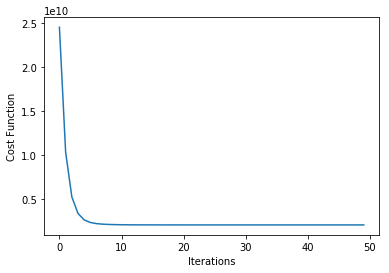

In [18]:
# Load the Data from .txt file
Data = np.loadtxt('lab1data2.txt', delimiter=',')

# Seperate the input (x) and output (y) data
x=np.atleast_2d(Data[:,:-1])
y=Data[:,-1]

# Size of data
m = y.size
y.shape = (m, 1)

# Normalize the data
X, Mu, Sigma = feature_Normalize(x)

# Make x = [1 x] to take care of bias

Xstack = np.ones(shape=(m, 3))
Xstack[:, 1:3] = X

#Initialize Parameters
Iter = 50
alpha = 0.4
w = np.zeros(shape=(3, 1))

# Gradient Descent
w, J = gradientDescent(Xstack, y, w, alpha, Iter)

# Plot Cost Function vs Iterations
plt.plot(np.arange(Iter), J)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

### Solution Question 3

In [19]:
# Prediction of new data

Price = np.array([1.0,   ((1650.0 - Mu[0]) / Sigma[0]), ((3 - Mu[1]) / Sigma[1])]).dot(w)
print('Predicted price of a 1650 sq-ft, 3 bedroom house is: {}' .format(Price))

Predicted price of a 1650 sq-ft, 3 bedroom house is: [293082.26208012]


#### ##Note
##### As we can see from the output of both Gradient Descent and Linear Regression the prediction is almost equal. Hence for the given data the best learning rate is alpha = 0.4.